To generate the pickle file:

    cd CEO/src
    python -m main.azure_rl --earliest-start 2022-04-03T00:00:00 --get-training-progress ../notebooks/progress.pkl


In [357]:
# Load the pickle file
import pickle

with open("progress.pkl", "rb") as f:
    data = pickle.load(f)
    
print("data keys", data.keys())
progress_df = data["progress"]
trainings_df = data["trainings"]
trainings_df.sort_values("last_pct_win", inplace=True, ascending=False)
trainings_df.set_index(keys="training_id", inplace=True)
display(trainings_df.shape)
display(progress_df.shape)

# Add a description column
trainings_df["desc"] = trainings_df["lambda"].astype('str') + " " + trainings_df["max_initial_visit_count"].astype('str')

# Remove bad rows from the trainings dataframe
# trainings_df = trainings_df.loc[trainings_df["max_episode"] > 1000000]
trainings_df = trainings_df.loc[trainings_df["action_space_type"] != ""]

data keys dict_keys(['trainings', 'progress'])


(10, 14)

(9893, 8)

In [358]:
progress_df = progress_df.join(trainings_df[
    ["desc", "lambda", "action_space_type", "max_initial_visit_count", "hs_high_card_obs_max"]], on="training_id")

# Remove bad rows from the trainings dataframe
progress_df = progress_df.loc[progress_df["action_space_type"] != ""]

### Trainings Dataframe

In [359]:
print(trainings_df.columns)
trainings_df.sort_values("max_pct_win", ascending=False) #[[ "max_initial_visit_count", "hs_high_card_obs_max",                                                        "action_space_type", "max_pct_win"]]

Index(['learning_type', 'action_space_type', 'start', 'lambda',
       'max_initial_visit_count', 'discount', 'alpha_exponent',
       'hs_high_card_obs_max', 'end', 'finished', 'final_pct_win',
       'max_episode', 'last_pct_win', 'max_pct_win', 'desc'],
      dtype='object')


,learning_type,action_space_type,start,lambda,max_initial_visit_count,discount,alpha_exponent,hs_high_card_obs_max,end,finished,final_pct_win,max_episode,last_pct_win,max_pct_win,desc
training_id,,,,,,,,,,,,,,,
tid_5f61e581-28bf-402d-b879-9a44df8850f7,qlearning_afterstates,ceo,2022-06-04 23:18:41.566120,0.0100,50000,0.7,0.6,3,None,False,None,24198000,0.72550,0.72762,0.01 50000
tid_0aac30ad-9635-4310-bc9f-06668a41ebc8,qlearning_afterstates,ceo,2022-06-04 23:19:02.853324,0.0001,50000,0.7,0.6,3,None,False,None,24998000,0.72532,0.72626,0.0001 50000
tid_1206e9e2-bcf1-45af-8161-adea1895c90a,qlearning_afterstates,ceo,2022-06-04 23:18:51.832642,0.0010,50000,0.7,0.6,3,None,False,None,24934000,0.72391,0.72502,0.001 50000
tid_fdd061da-6ba3-4734-b318-b98f59a72874,qlearning_afterstates,ceo,2022-06-04 23:18:35.489505,0.1000,50000,0.7,0.6,3,None,False,None,20920000,0.71436,0.71964,0.1 50000
tid_9ced89f6-b871-4b8e-bfe5-714085e281a6,qlearning_afterstates,ceo,2022-06-04 23:18:36.762196,0.5000,50000,0.7,0.6,3,None,False,None,18776000,0.71000,0.71427,0.5 50000
tid_8d2aecab-59e7-4012-9b11-a9b71875243c,qlearning_afterstates,ceo,2022-06-04 23:18:32.527650,0.0100,10000,0.7,0.6,3,None,False,None,11854000,0.70698,0.71232,0.01 10000
tid_226a197d-0d67-45d2-b95a-2f0eb50b2fe0,qlearning_afterstates,ceo,2022-06-04 23:18:33.606342,0.0001,10000,0.7,0.6,3,None,False,None,12760000,0.70450,0.71102,0.0001 10000
tid_f354c8c5-b530-4a04-b1ee-5165f3250fdd,qlearning_afterstates,ceo,2022-06-04 23:21:36.635888,0.0010,10000,0.7,0.6,3,None,False,None,12728000,0.70571,0.71027,0.001 10000
tid_8e777846-abc1-4cf3-984c-b1247aeaf714,qlearning_afterstates,ceo,2022-06-04 23:15:27.777207,0.1000,10000,0.7,0.6,3,None,False,None,8374000,0.70223,0.70223,0.1 10000


In [360]:
# Filtered trainings dataframe print(trainings_df.columns)
trainings_df.sort_values("max_pct_win", ascending=False)[[ 
    "max_initial_visit_count", "hs_high_card_obs_max", "action_space_type", "max_pct_win", "lambda"]]

,max_initial_visit_count,hs_high_card_obs_max,action_space_type,max_pct_win,lambda
training_id,,,,,
tid_5f61e581-28bf-402d-b879-9a44df8850f7,50000,3,ceo,0.72762,0.0100
tid_0aac30ad-9635-4310-bc9f-06668a41ebc8,50000,3,ceo,0.72626,0.0001
tid_1206e9e2-bcf1-45af-8161-adea1895c90a,50000,3,ceo,0.72502,0.0010
tid_fdd061da-6ba3-4734-b318-b98f59a72874,50000,3,ceo,0.71964,0.1000
tid_9ced89f6-b871-4b8e-bfe5-714085e281a6,50000,3,ceo,0.71427,0.5000
tid_8d2aecab-59e7-4012-9b11-a9b71875243c,10000,3,ceo,0.71232,0.0100
tid_226a197d-0d67-45d2-b95a-2f0eb50b2fe0,10000,3,ceo,0.71102,0.0001
tid_f354c8c5-b530-4a04-b1ee-5165f3250fdd,10000,3,ceo,0.71027,0.0010
tid_8e777846-abc1-4cf3-984c-b1247aeaf714,10000,3,ceo,0.70223,0.1000


### Progress Dataframe

In [361]:
progress_df.sort_values("pct_win", ascending=False)

,training_id,episode,avg_rewards,recent_rewards,states_visited,explore_rate,pct_win,skipped_episodes,desc,lambda,action_space_type,max_initial_visit_count,hs_high_card_obs_max
3548,tid_5f61e581-28bf-402d-b879-9a44df8850f7,14000000,NaN,NaN,NaN,NaN,0.72762,NaN,0.01 50000,0.01,ceo,50000,3
3532,tid_5f61e581-28bf-402d-b879-9a44df8850f7,13600000,NaN,NaN,NaN,NaN,0.72721,NaN,0.01 50000,0.01,ceo,50000,3
3897,tid_5f61e581-28bf-402d-b879-9a44df8850f7,21500000,NaN,NaN,NaN,NaN,0.72678,NaN,0.01 50000,0.01,ceo,50000,3
3852,tid_5f61e581-28bf-402d-b879-9a44df8850f7,20600000,NaN,NaN,NaN,NaN,0.72671,NaN,0.01 50000,0.01,ceo,50000,3
3902,tid_5f61e581-28bf-402d-b879-9a44df8850f7,21600000,NaN,NaN,NaN,NaN,0.72656,NaN,0.01 50000,0.01,ceo,50000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9887,tid_fdd061da-6ba3-4734-b318-b98f59a72874,20858000,0.401583,0.3800,480932.0,0.033708,NaN,0.5,0.1 50000,0.10,ceo,50000,3
9888,tid_fdd061da-6ba3-4734-b318-b98f59a72874,20876000,0.401574,0.3932,480981.0,0.034345,NaN,0.5,0.1 50000,0.10,ceo,50000,3
9889,tid_fdd061da-6ba3-4734-b318-b98f59a72874,20894000,0.401566,0.3952,481028.0,0.034536,NaN,0.5,0.1 50000,0.10,ceo,50000,3
9891,tid_fdd061da-6ba3-4734-b318-b98f59a72874,20902000,0.401561,0.3950,481069.0,0.033919,NaN,0.5,0.1 50000,0.10,ceo,50000,3


### Recent rewards

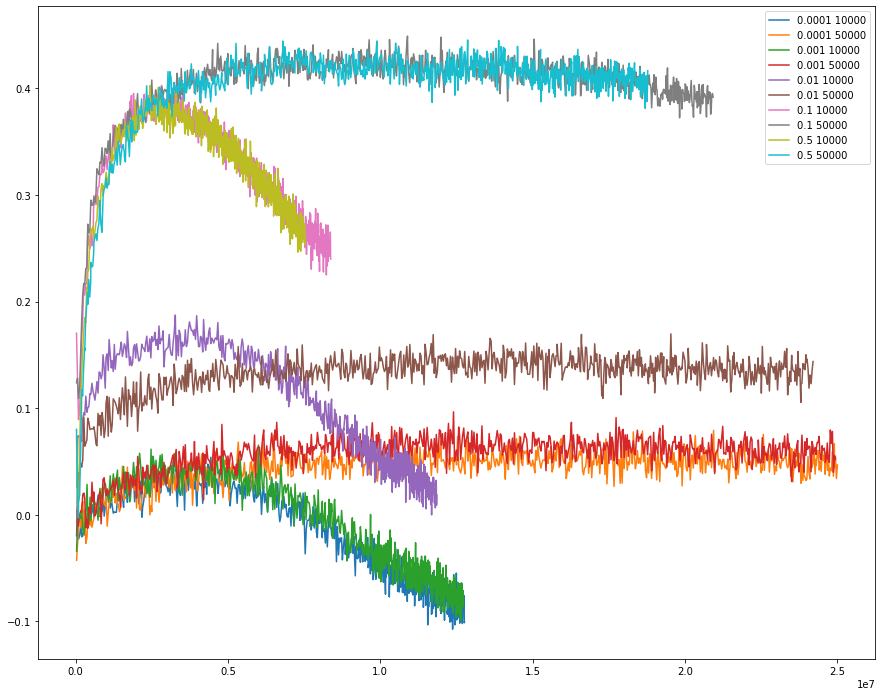

In [362]:
import matplotlib.pyplot as plt
import numpy as np

plot_df = progress_df.pivot(index="episode", columns="desc", values="recent_rewards")

xs = plot_df.index.to_series()

for column in plot_df.columns:
    series = plot_df[column]
    smask = np.isfinite(series)

    plt.plot(xs[smask], series[smask], linestyle='-', marker='', label=column)

plt.legend()
plt.show()

### Percent win

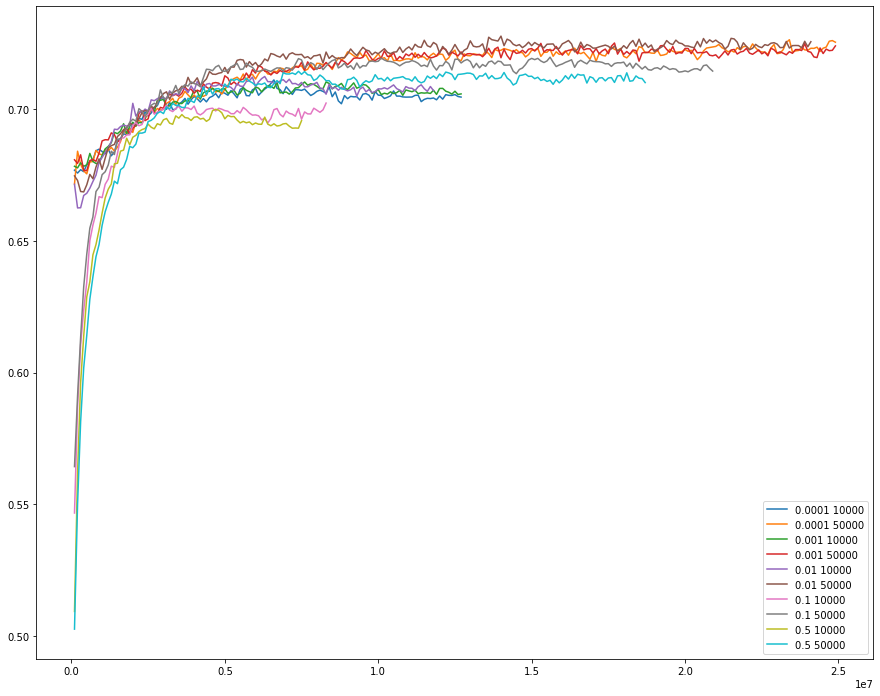

In [363]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (15,12)

plot_df = progress_df.pivot(index="episode", columns="desc", values="pct_win")

xs = plot_df.index.to_series()

for column in plot_df.columns:
    series = plot_df[column]
    smask = np.isfinite(series)

    plt.plot(xs[smask], series[smask], linestyle='-', marker='', label=column)


#plt.ylim(0.5, 0.8)
plt.legend()
plt.show()

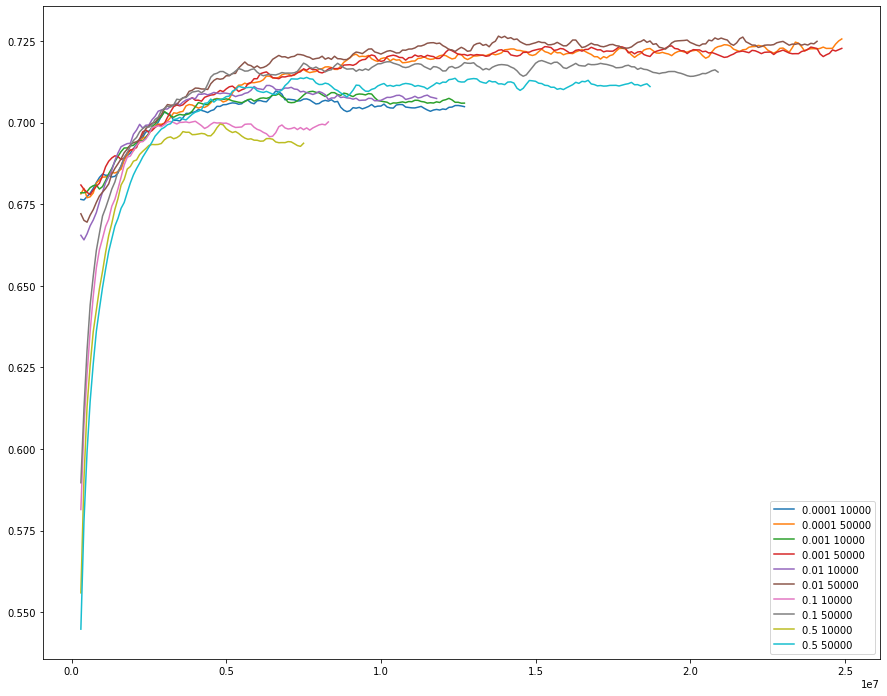

In [364]:
# Plot moving average of test stats

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (15,12)

plot_df = progress_df.pivot(index="episode", columns="desc", values="pct_win")

xs = plot_df.index.to_series()

for column in plot_df.columns:
    series = plot_df[column]
    smask = np.isfinite(series)
    
    x = xs[smask]
    y = series[smask]
    
    y_moving_average = y.rolling(3).mean()

    plt.plot(x, y_moving_average, linestyle='-', marker='', label=column)

# plt.ylim(0.75, 0.8)
plt.legend()
plt.show()

### Skipped episodes

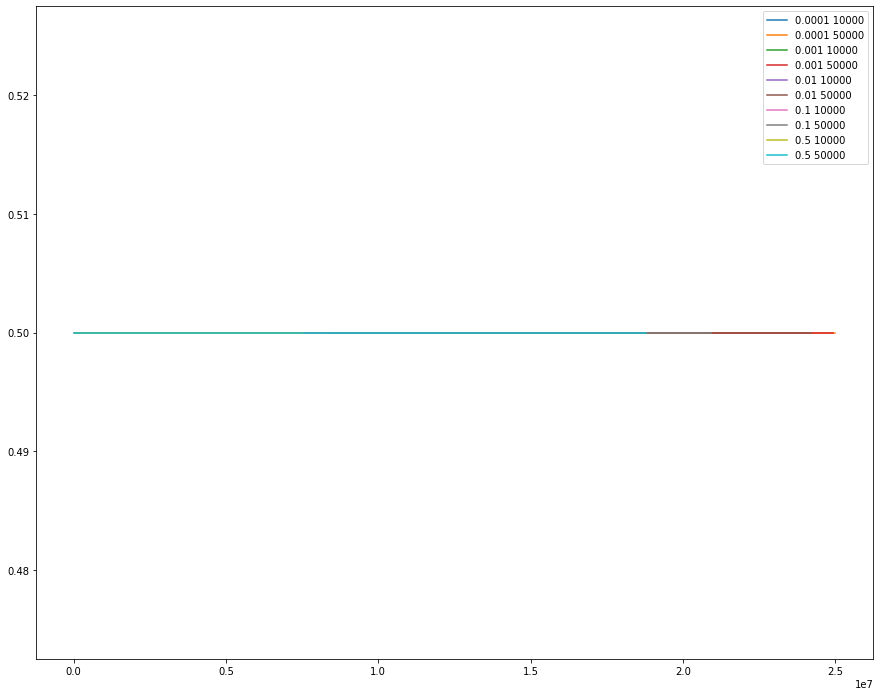

In [365]:
# Plot skipped episodes

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (15,12)

plot_df = progress_df.pivot(index="episode", columns="desc", values="skipped_episodes")

xs = plot_df.index.to_series()

for column in plot_df.columns:
    series = plot_df[column]
    smask = np.isfinite(series)
    
    x = xs[smask]
    y = series[smask]
    
    y_moving_average = y.rolling(1).mean()

    plt.plot(x, y_moving_average, linestyle='-', marker='', label=column)

# plt.ylim(0.75, 0.8)
plt.legend()
plt.show()

### Explore rate

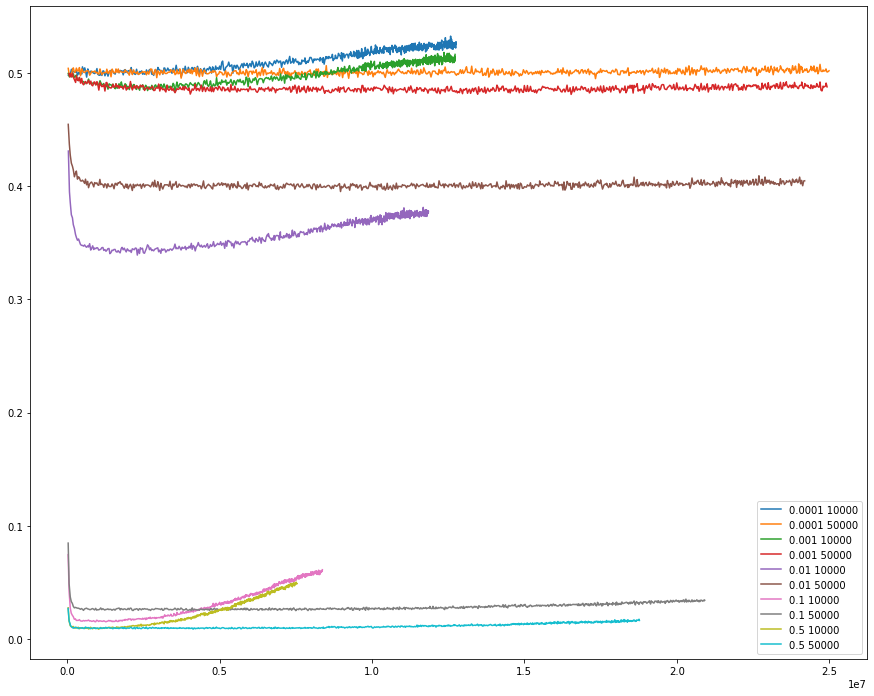

In [366]:
# Plot explore rate episodes

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (15,12)

plot_df = progress_df.pivot(index="episode", columns="desc", values="explore_rate")

xs = plot_df.index.to_series()

for column in plot_df.columns:
    series = plot_df[column]
    smask = np.isfinite(series)
    
    x = xs[smask]
    y = series[smask]
    
    y_moving_average = y.rolling(1).mean()

    plt.plot(x, y_moving_average, linestyle='-', marker='', label=column)

# plt.ylim(0.75, 0.8)
plt.legend()
plt.show()

<AxesSubplot:xlabel='explore_rate', ylabel='pct_win'>

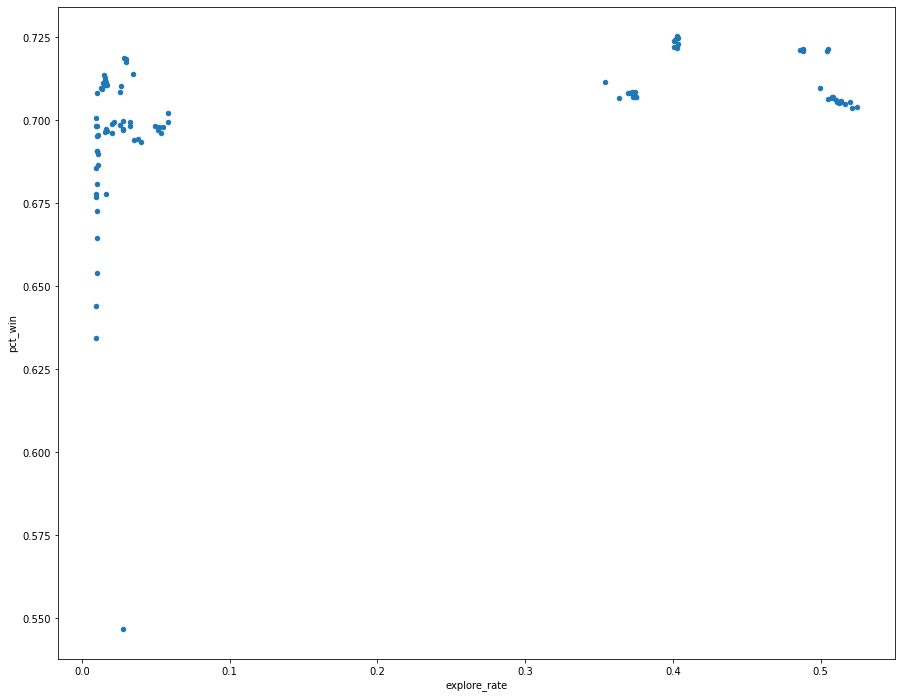

In [367]:
training = "tid_719848c6-b9f2-45c3-a4b8-176fe4ff703e"

plt.rcParams["figure.figsize"] = (15,12)

plot_df = progress_df.copy()

plot_df.plot.scatter(x="explore_rate", y="pct_win")



In [368]:
progress_df.columns


Index(['training_id', 'episode', 'avg_rewards', 'recent_rewards',
       'states_visited', 'explore_rate', 'pct_win', 'skipped_episodes', 'desc',
       'lambda', 'action_space_type', 'max_initial_visit_count',
       'hs_high_card_obs_max'],
      dtype='object')